## Applied

### 8

1. This exercise relates to the __College__ data set, which can be found in the file `College.csv`. It contains a number of variables for 777 different universities and colleges in the US. The variables are

    - __Private__: Public / private indicator
    - __Apps__: Number of applications received
    - __Accept__: Number of applicants accepted
    - __Enroll__: Number of new students enrolled
    - __Top10perc__: New students from top 10% of high school class
    - __Top25perc__: New students from top 25% of high school class
    - __F.Undergrad__: Number of full-time undergraduates
    - __P.Undergrad__: Number of part-time undergraduates
    - __Outstate__: Out-of-state tuition
    - __Room.Board__: Room and board costs
    - __Books__: Estimated book costs
    - __Personal__: Estimated personal spending
    - __PhD__: Percent of faculty with Ph.D's
    - __Terminal__: Percent of faculty with a terminal degree
    - __S.F.Ratio__: Student / faculty ratio
    - __perc.alumni__: Percent of alumni who donate
    - __Expend__: Instructional expenditure per student
    - __Grad.Rate__: Graduation rate

    Before reading the data into _python_, it can be viewed in Excel or a text editor.
    
    1. Use the `pd.read_csv()` function to read the data into _python_. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.
    1. Look at the data using the `head()` function. You should notice that the first column is just the name of each university. We don't really want _python_ to treat this as data. However, it may be handy to have these names for later. Try the following commands:
    
    ```
        college.set_index('Unnamed: 0',inplace=True)
        college.index.rename('University Name',inplace=True)
    ```
        
    1. 
        1. Use the `describe()` function to produce a numerical summary of the variables in the data set.
        1. Use the `pandas.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a `DataFrame df` using `df.iloc[:,:10]`.
        1. Use the `plot.box()` function to produce side-by-side boxplots of `Outstate` versus `Private`.
        1. Create a new qualitative variable, called `Elite`, by _binning_ the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.
        
            ```
            college['Elite'] = 'No'
            college.loc[college['Top10perc'] > 50,'Elite'] = 'Yes'
            ```
            
            Use the `summary()` function to see how many elite universities there are. Now use the `plot()` function to produce side-by-side boxplots of `Outstate` versus `Elite`.
        1. Use the `hist()` function to produce some histograms with different numbers of bins for a few of the quantitative variables. You may find the command `plt.subplots(2,2)` useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.


#### Answers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = './data/'
!ls {PATH}

Auto.csv  Auto.data  Boston.csv  boston.data  College.csv


In [3]:
college = pd.read_csv(f'{PATH}College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college.set_index('Unnamed: 0',inplace=True)
college.index.rename('University Name',inplace=True)

In [5]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


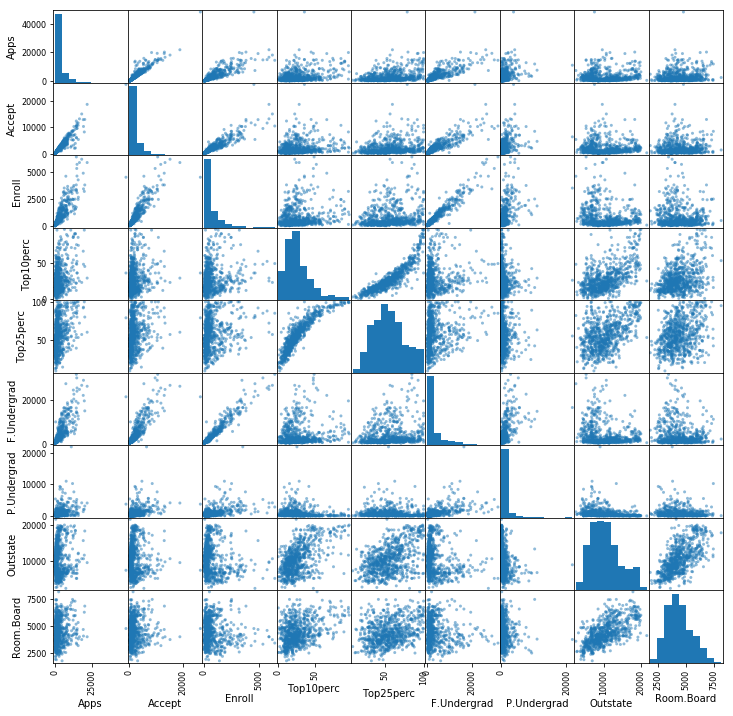

In [7]:
from pandas import plotting

plotting.scatter_matrix(college.iloc[:,:10],figsize=(12,12))
plt.show()

In [8]:
# d = {'Yes': 1, 'No': 0}
# college['Private'] = college['Private'].map(d)

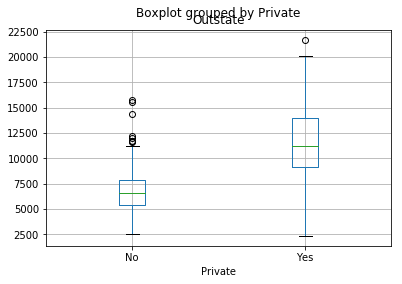

In [9]:
college.boxplot(column='Outstate',by='Private')

In [10]:
college['Elite'] = 'No'
college.loc[college['Top10perc'] > 50,'Elite'] = 'Yes'

In [11]:
college['Elite'].describe()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object

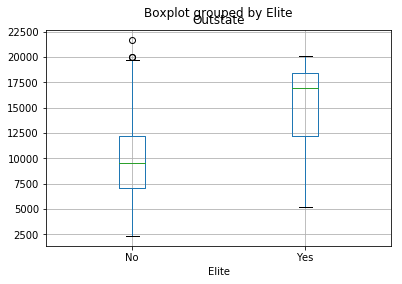

In [12]:
college.boxplot(column='Outstate',by='Elite')

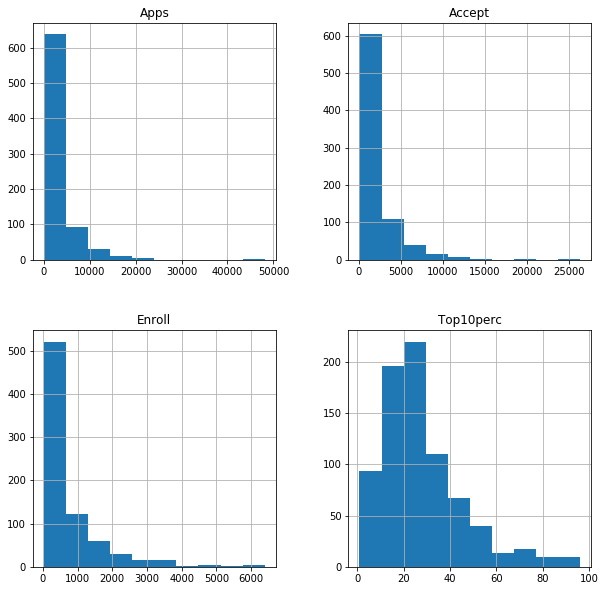

In [13]:
f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
college.hist(column='Apps',ax=ax1)
college.hist(column='Accept',ax=ax2)
college.hist(column='Enroll',ax=ax3)
college.hist(column='Top10perc',ax=ax4)
plt.show()

### 9

1. This exercise involves the `Auto` dataset studied in the lab. Make sure that the missing values have been removed from the data.
    1. Which of the predictors are quantitative, and which are qualitative?
    1. What is the _range_ of each quantitative predictor? You can answer this using the `describe()` function.
    1. What is the mean and standard deviation of each quantitative predictor?
    1. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?
    1. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.
    1. Suppose that we wish to predict gase mileage (_mpg_) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting _mpg_? Justify your answer.

#### Answers

In [14]:
!sed -r 's/(\s+\s+)|\t/,/g' {PATH}Auto.data > {PATH}Auto.csv
!sed -ri 's/horsepower weight/horsepower,weight/g' {PATH}Auto.csv
!sed -ri 's/name,/name/g' {PATH}Auto.csv

In [15]:
auto = pd.read_csv(f'{PATH}Auto.csv',sep=',')

In [16]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


- __Quantitative predictors__: mpg, displacement, horsepower, weight, acceleration
- __Qualitative predictors__: cylinders, year, origin

In [17]:
# remove missing values
import numpy as np

In [18]:
auto.loc[auto['horsepower'] == '?','horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dropna(inplace=True)
auto.reset_index(inplace=True,drop=True)

In [19]:
# show range, alternatively use describe()
quant = ['mpg','displacement','horsepower','weight','acceleration']
pd.DataFrame([auto[quant].min().values, auto[quant].max().values],columns=quant,index=['min','max'])

,mpg,displacement,horsepower,weight,acceleration
min,9.0,68.0,46.0,1613.0,8.0
max,46.6,455.0,230.0,5140.0,24.8


In [20]:
auto[quant].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [21]:
auto[quant].drop(index=range(10,85)).describe()

,mpg,displacement,horsepower,weight,acceleration
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,187.880126,101.003155,2938.854890,15.704101
std,7.872565,100.169973,36.003208,811.640668,2.719913
min,11.000000,68.000000,46.000000,1649.000000,8.500000
25%,18.000000,101.000000,75.000000,2215.000000,14.000000
50%,23.900000,146.000000,90.000000,2795.000000,15.500000
75%,30.500000,250.000000,115.000000,3520.000000,17.300000
max,46.600000,455.000000,230.000000,4997.000000,24.800000


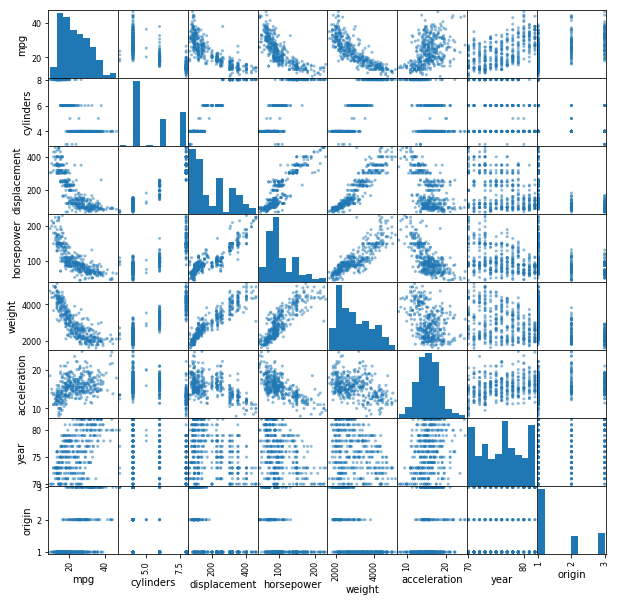

In [22]:
plotting.scatter_matrix(auto, figsize=(10,10))
plt.show()

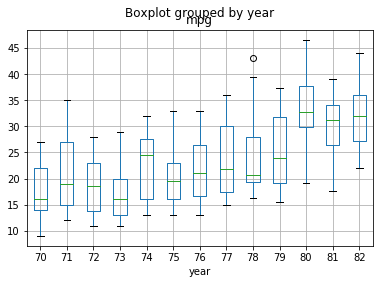

In [23]:
plotting.boxplot(auto, column='mpg', by='year')

According to the scatterplot there is some correlation between mpg, the year, the weight, acceleration (small), weight, displacement and even the cylinder count. So I think it might be possible to use those variables as predictors for mpg.

### 10

1. This exercise involves the _Boston_ housing data set.
    1. To begin, load in the _Boston_ data set. The _Boston_ data set in part of the _MASS_ library in _R_.  
        How many rows are in this data set? How many columns? What do the rows and columns represent?
    1. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.
    1. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
    1. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.
    1. How many of the suburbs in this data set bound the Charles river?
    1. What is the median pupil-teacher ratio among the towns in this data set?
    1. Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.
    1. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

#### Answers

In [24]:
boston = pd.read_csv(f'{PATH}Boston.csv',index_col=0)

In [25]:
boston.shape

(506, 14)

There are 506 rows and 14 columns. Each row represens a suburb, the columns represent the following:

- __CRIM__     per capita crime rate by town
- __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
- __INDUS__    proportion of non-retail business acres per town
- __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- __NOX__      nitric oxides concentration (parts per 10 million)
- __RM__       average number of rooms per dwelling
- __AGE__      proportion of owner-occupied units built prior to 1940
- __DIS__      weighted distances to five Boston employment centres
- __RAD__      index of accessibility to radial highways
- __TAX__      full-value property-tax rate per USD10,000
- __PTRATIO__  pupil-teacher ratio by town
- __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- __LSTAT__    % lower status of the population
- __MEDV__     Median value of owner-occupied homes in USD1000's


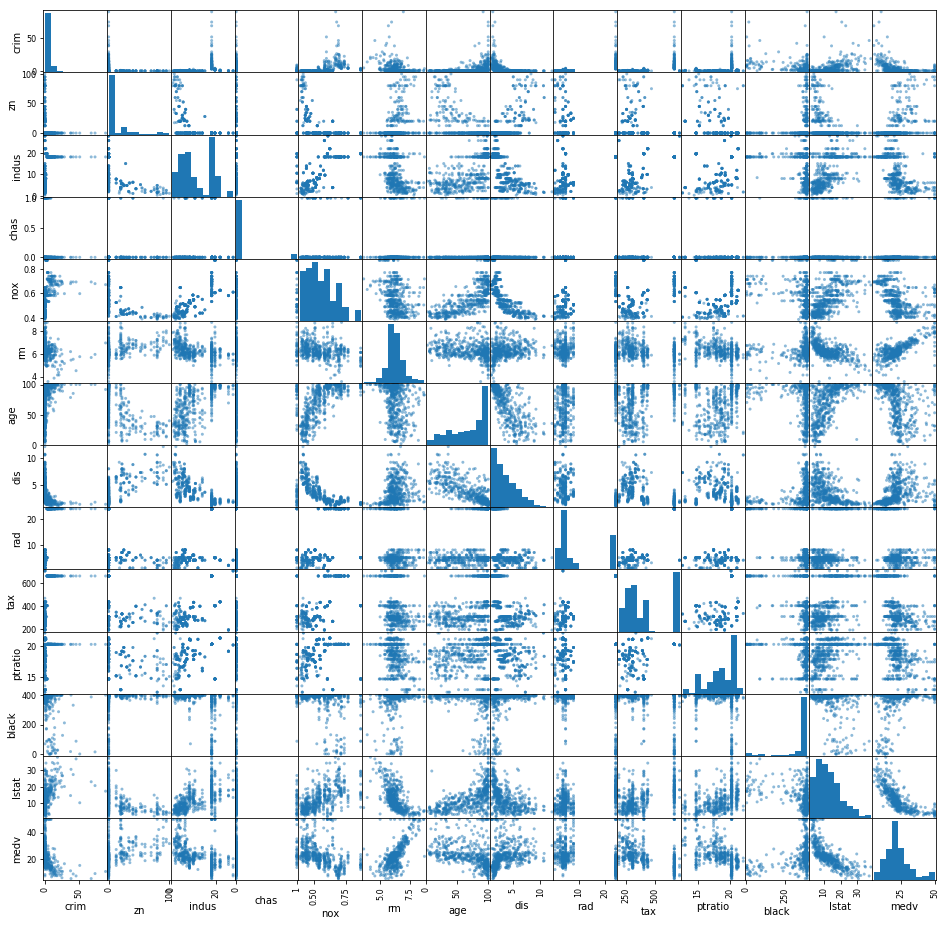

In [26]:
plotting.scatter_matrix(boston,figsize=(16,16))
plt.show()

In [27]:
boston.sort_values('crim', ascending=False).head() # show suburbs with a high crime rate

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0


In [28]:
boston.sort_values('tax', ascending=False).head() # show suburbs with a high tax rate

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2


In [29]:
boston.sort_values('ptratio', ascending=False).head() # show suburbs with a high pupil-teacher ratio

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
355,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
356,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
136,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1
128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
137,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4


In [30]:
np.sum(boston['chas'])

35

There are 35 suburbs which bound the Charles river.

In [31]:
np.mean(boston['ptratio'])

18.455533596837967

The median pupil-teacher ratio is 18.46.

In [32]:
boston.sort_values('medv', ascending=True).head(1) # show suburbs with the lowest median value of owner occupied homes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.9,30.59,5.0


In [33]:
def predictors_range(df):
    mins = [np.min(df[column]) for column in df.columns]
    maxs = [np.max(df[column]) for column in df.columns]
    return pd.DataFrame([mins,maxs],columns=df.columns,index=['min','max'])

In [34]:
predictors_range(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50.0


The suburb with the lowest median value of owner occupied homes is on the border of nearly each predictor range.

In [35]:
boston[boston['rm']>7].shape # 64 suburbs average more than 7 rooms per dwelling

(64, 14)

In [36]:
boston[boston['rm']>8].shape # 13 suburbs average more than 8 rooms per dwelling

(13, 14)